# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

In [1]:
pip install scikit-learn --upgrade

     |████████████████████████████████| 10.9 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 62.6 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error, r2_score
import math

from sklearn.model_selection import train_test_split

from IPython.display import display

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4766,0,24.0,37100.0,3,0
4317,1,29.0,29100.0,1,0
2029,0,24.0,35800.0,4,0
596,1,29.0,40300.0,1,0
2782,1,25.0,43000.0,1,0
4923,0,48.0,58200.0,0,1
1748,1,20.0,28100.0,1,0
419,0,30.0,20000.0,2,0
352,0,31.0,32900.0,1,0
1420,1,22.0,47800.0,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
df['age'] = df['age'].round().astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [10]:
df.describe()


,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


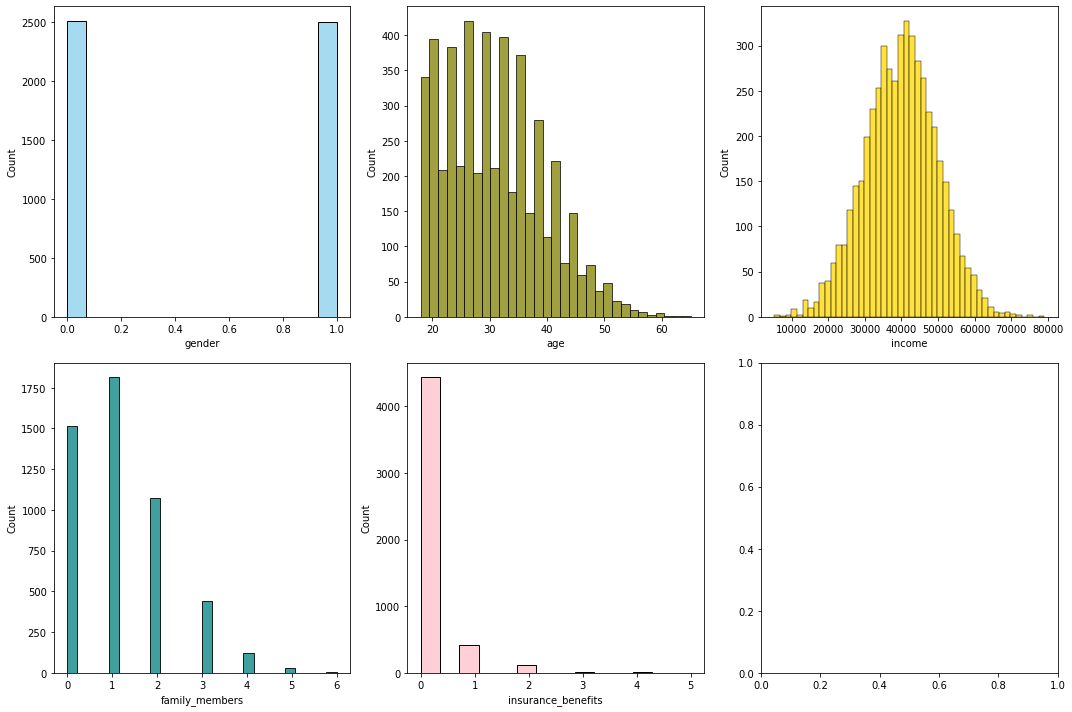

In [11]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False)


sns.histplot(data=df, x="gender", color="skyblue", ax=axes[0, 0])
sns.histplot(data=df, x="age", color="olive", ax=axes[0, 1])
sns.histplot(data=df, x="income", color="gold", ax=axes[0, 2])
sns.histplot(data=df, x="family_members", color="teal", ax=axes[1, 0])
sns.histplot(data=df, x="insurance_benefits", color="pink", ax=axes[1, 1])

plt.tight_layout()
plt.show()


Looking breifly at the descriptive statistics, all seems to be reasonable and in order. The minimum income of 5300 dollars seems low, but I think that this is an appropriate datapoint. This could be explained by someone being a student or out of work. 

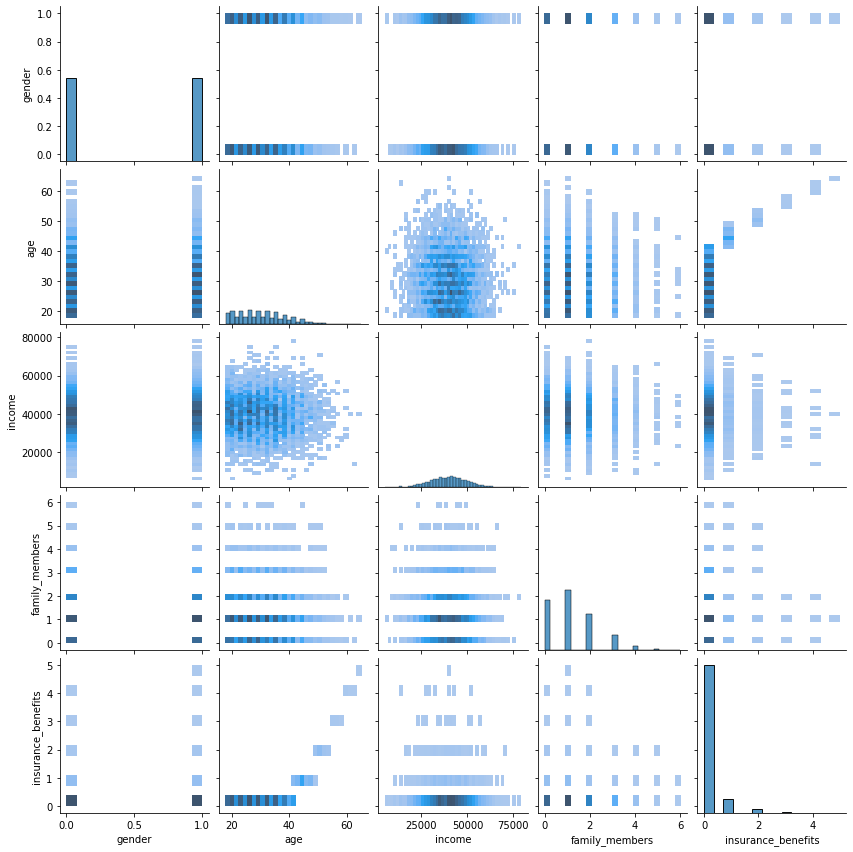

In [12]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1516,0.0,0.553846,0.473418,0.000000,0
3079,0.0,0.600000,0.340506,0.833333,0
277,1.0,0.492308,0.546835,0.000000,0
1682,0.0,0.630769,0.456962,0.166667,0
3293,1.0,0.400000,0.563291,0.166667,0


In [16]:
def get_knn(df, n, k, metric, scale=False):
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    :param scale: whether to scale the data or not
    """
    
    if scale:
        scaler = MaxAbsScaler()
        df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(df)
    nbrs_distances, nbrs_indices = nbrs.kneighbors(df.iloc[[n]])
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
    ], axis=1)
    
    return df_res


In [17]:
n = 0 
df1 = get_knn(df, n, k=5, metric='euclidean', scale=False)
print("Case 1: Data is not scaled, Euclidean distance metric")
print(df1)


Case 1: Data is not scaled, Euclidean distance metric
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  2.000000
3424       0   38  49600.0               0                   0  3.316625
4031       1   44  49600.0               2                   1  3.316625


In [18]:
df2 = get_knn(df, n, k=5, metric='manhattan', scale=False)
print("\nCase 2: Data is not scaled, Manhattan distance metric")
print(df2)


Case 2: Data is not scaled, Manhattan distance metric
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0       0.0
2022       1   41  49600.0               0                   0       1.0
1225       0   42  49600.0               0                   1       4.0
3424       0   38  49600.0               0                   0       5.0
4031       1   44  49600.0               2                   1       5.0


In [19]:
df3 = get_knn(df, n, k=5, metric='euclidean', scale=True)
print("\nCase 3: Data is scaled, Euclidean distance metric")
print(df3)


Case 3: Data is scaled, Euclidean distance metric
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                 0.0  0.000000
2689     1.0  0.630769  0.634177        0.166667                 0.0  0.006329
133      1.0  0.615385  0.636709        0.166667                 0.0  0.017754
1567     1.0  0.615385  0.602532        0.166667                 0.0  0.029624
3365     1.0  0.630769  0.596203        0.166667                 0.0  0.031646


In [20]:
df4 = get_knn(df, n, k=5, metric='manhattan', scale=True)
print("\nCase 4: Data is scaled, Manhattan distance metric")
print(df4)


Case 4: Data is scaled, Manhattan distance metric
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                 0.0  0.000000
2689     1.0  0.630769  0.634177        0.166667                 0.0  0.006329
133      1.0  0.615385  0.636709        0.166667                 0.0  0.024245
2103     1.0  0.630769  0.596203        0.166667                 0.0  0.031646
3365     1.0  0.630769  0.596203        0.166667                 0.0  0.031646


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes, it appears that when the data is not scaled, larger distances may dominate the calculation. For Euclidian distance, the scaling matters. Scaling vs not scaling results in different datapoints being in the top five closes neibors. 

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

It seems that Manhattan distance measurement for this case results in finding nearest neighbors that are completely different if you scale vs not scale. The relative distances seem to follow a somewhat similar pattern though it could be argued. 

In [21]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [22]:
# check for the class imbalance with value_counts()

display(df['insurance_benefits_received'].value_counts())

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

There is a class imbalance, with many more benefits never being given than having benefits given. I will correct for this. 

In [23]:
X = df.drop(columns=['insurance_benefits', 'insurance_benefits_received'])
y = (df['insurance_benefits'] > 0).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


df_train = pd.concat([X_train, y_train], axis=1)

In [24]:
df_majority = df_train[df_train.insurance_benefits==0]
df_minority = df_train[df_train.insurance_benefits==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),   
                                 random_state=42) 

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.insurance_benefits.value_counts())

# Separate features and target
y_train = df_upsampled.insurance_benefits
X_train = df_upsampled.drop('insurance_benefits', axis=1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

0    3097
1    3097
Name: insurance_benefits, dtype: int64


Now, the upsampling was done after the training and test set were seperated. 

In [25]:
def eval_classifier(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    print(f'F1: {f1:.2f}')
    cm = confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

# Evaluate KNN with different k values and data
for k in range(1, 11):
    for data, label in zip((X_train, X_train_scaled), ('Original', 'Scaled')):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(data, y_train)
        y_pred = knn.predict(X_test if label == 'Original' else X_test_scaled)
        print(f'For {label} data with k={k}:')
        eval_classifier(y_test, y_pred)

For Original data with k=1:
F1: 0.65
Confusion Matrix
[[0.874      0.01866667]
 [0.04666667 0.06066667]]
For Scaled data with k=1:
F1: 0.92
Confusion Matrix
[[0.88666667 0.006     ]
 [0.01066667 0.09666667]]
For Original data with k=2:
F1: 0.65
Confusion Matrix
[[0.87466667 0.018     ]
 [0.04733333 0.06      ]]
For Scaled data with k=2:
F1: 0.92
Confusion Matrix
[[0.88666667 0.006     ]
 [0.01066667 0.09666667]]
For Original data with k=3:
F1: 0.60
Confusion Matrix
[[0.85066667 0.042     ]
 [0.04333333 0.064     ]]
For Scaled data with k=3:
F1: 0.93
Confusion Matrix
[[0.88066667 0.012     ]
 [0.004      0.10333333]]
For Original data with k=4:
F1: 0.60
Confusion Matrix
[[0.85133333 0.04133333]
 [0.044      0.06333333]]
For Scaled data with k=4:
F1: 0.93
Confusion Matrix
[[0.88066667 0.012     ]
 [0.004      0.10333333]]
For Original data with k=5:
F1: 0.56
Confusion Matrix
[[0.82466667 0.068     ]
 [0.03933333 0.068     ]]
For Scaled data with k=5:
F1: 0.91
Confusion Matrix
[[0.8746666

Dummy Model for comparison: 

In [26]:
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

for P in [0, y_train.mean(), 0.5, 1]:
    y_pred = rnd_model_predict(P, len(y_test))
    print(f'For dummy model with P={P}:')
    eval_classifier(y_test, y_pred)

For dummy model with P=0:
F1: 0.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.10733333 0.        ]]
For dummy model with P=0.5:
F1: 0.20
Confusion Matrix
[[0.45733333 0.43533333]
 [0.048      0.05933333]]
For dummy model with P=0.5:
F1: 0.20
Confusion Matrix
[[0.45733333 0.43533333]
 [0.048      0.05933333]]
For dummy model with P=1:
F1: 0.19
Confusion Matrix
[[0.         0.89266667]
 [0.         0.10733333]]


The scaled models all perform well in terms of the F1 score, which is far better than the dummy model, whcih never gets above .2 for F1 score. 

In [27]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        return y_pred

In [28]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    r2 = r2_score(y_true, y_pred)
    print(f'R2: {r2:.2f}')    


In [29]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.43


In [30]:

X = df[['age', 'gender', 'income', 'family_members']]
y = (df['insurance_benefits'] > 0).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)


lr = MyLinearRegression()
lr.fit(X_train_scaled, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test_scaled)
eval_regressor(y_test, y_test_pred)


[ 0.11457143  0.20964508 -0.00036542  0.00135641 -0.00688148]
RMSE: 0.23
R2: 0.44


It seems scaling makes very little difference at all in regard to R2, and that linear regression does not change if scaling is done

In [31]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [32]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [33]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [34]:
try:
    np.linalg.inv(P)
except np.linalg.LinAlgError:
    print("Matrix P is not invertible.")
else:
    
    X_prime = np.dot(X, P)
    print("Transformed features:")
    print(X_prime)

Transformed features:
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]


Can you guess the customers' ages or income after the transformation?

No, it would be incredibly difficult to guess the ages or income after doing this without knowing exactly what method was used to obfuscute the data. 

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

If you know P, then it is possible to recover the original data. 

In [35]:

P_inv = np.linalg.inv(P)
X_recovered = np.dot(X_prime, P_inv)


Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [36]:
import numpy as np


personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]
X = df_pn.to_numpy()


rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))


try:
    np.linalg.inv(P)
except np.linalg.LinAlgError:
    print("Matrix P is not invertible.")
else:
    
    X_prime = np.dot(X, P)
    
    
    P_inv = np.linalg.inv(P)
    X_recovered = np.dot(X_prime, P_inv)

    
    for i in range(5):  
        print(f"Customer {i+1}:")
        print("\nOriginal Data:")
        print(X[i])
        print("\nTransformed Data:")
        print(X_prime[i])
        print("\nRecovered Data:")
        print(X_recovered[i])
        print("\n---\n")


Customer 1:

Original Data:
[1.00e+00 4.10e+01 4.96e+04 1.00e+00]

Transformed Data:
[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]

Recovered Data:
[1.00e+00 4.10e+01 4.96e+04 1.00e+00]

---

Customer 2:

Original Data:
[0.0e+00 4.6e+01 3.8e+04 1.0e+00]

Transformed Data:
[ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]

Recovered Data:
[-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]

---

Customer 3:

Original Data:
[    0.    29. 21000.     0.]

Transformed Data:
[ 2693.11742928  9486.397744    7808.83156024 19484.86063067]

Recovered Data:
[-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]

---

Customer 4:

Original Data:
[0.00e+00 2.10e+01 4.17e+04 2.00e+00]

Transformed Data:
[ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]

Recovered Data:
[-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]

---

Customer 5:

Original Data:
[1.00e+00 2.80e+01 2.61e+04 0.00e+00]

Transformed Data:
[ 3347.1767

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

The values are very close to the original in some cases, but not exact in every case. This is because of rounding errors presumably. Some irrational numbers do not have an exact value and their decimal numbers go on for infinity. 

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [37]:
class ObfuscatedLinearRegression:
    def __init__(self, obfuscate=True):
        self.obfuscate = obfuscate
        self.regr = LinearRegression()
        self.P = None

    def fit(self, X, y):
        if self.obfuscate:
            self.P = np.random.rand(X.shape[1], X.shape[1])
            while np.linalg.matrix_rank(self.P) < len(self.P):
                self.P = np.random.rand(X.shape[1], X.shape[1])
            X = np.dot(X, self.P)
        self.regr.fit(X, y)

    def predict(self, X):
        if self.obfuscate:
            X = np.dot(X, self.P)
        return self.regr.predict(X)

In [38]:
X = df.drop(columns=['insurance_benefits'])
y = df['insurance_benefits']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
regr = ObfuscatedLinearRegression(obfuscate=False)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"Original Data: RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}, R2 = {r2_score(y_test, y_pred)}")

Original Data: RMSE = 0.22110486038594188, R2 = 0.7866629976839693


In [40]:
regr = ObfuscatedLinearRegression(obfuscate=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"Obfuscated Data: RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}, R2 = {r2_score(y_test, y_pred)}")

Obfuscated Data: RMSE = 0.22110486039081015, R2 = 0.7866629976745749


The original data and the obfuscated data have basically the same RMSE and R2 values. The differences are so small that they do not truly matter, showing that this is a reliable way to obfuscate data without harming the quality of the data or the analysis of said data. 

# Conclusions

In conclusion, I found customers similar to a given customer and then trained a model to predict if a new customer will need benefits. The trained model does better than the dummy model. 

I then predicted the number of insurance benefits a customer is likely to receive using a linear regression model. It was successful, and then I showed that the R2 value is not impacted by scaling when using a linear regression model. 

Finally, the clients had their data protected through obfuscation without impacting the quality of the data or the ability to train models on the data. 